## statistical arbitrage in cross market

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


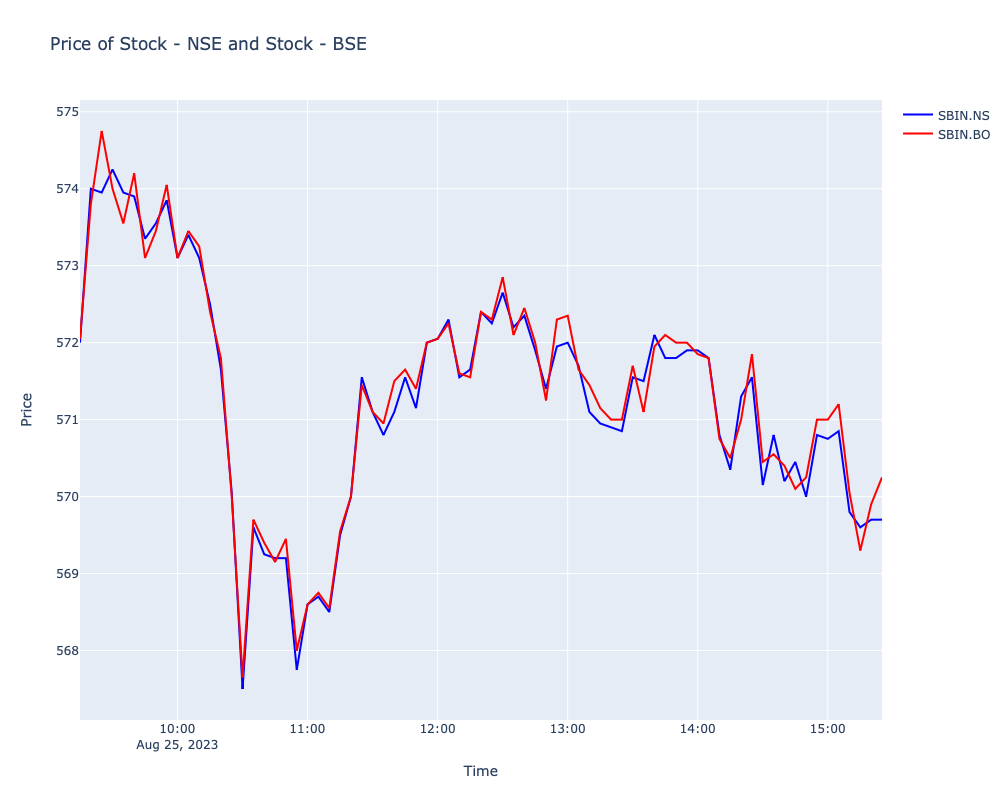

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from datetime import datetime

# Ticker symbol for Indian Overseas Bank on NSE and BSE
nse_symbol = "SBIN.NS"
bse_symbol = "SBIN.BO"

# Fetch data from NSE and BSE
nse_data = yf.download(nse_symbol, period="1d", interval="5m")
bse_data = yf.download(bse_symbol, period="1d", interval="5m")

# Create an interactive subplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add traces to the subplot
fig.add_trace(go.Scatter(x=nse_data.index, y=nse_data['Close'], mode='lines', name=nse_symbol, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=bse_data.index, y=bse_data['Close'], mode='lines', name=bse_symbol, line=dict(color='red')))

fig.update_layout(title='Price of Stock - NSE and Stock - BSE',
                  xaxis_title='Time',
                  yaxis_title='Price',
                 width=1000,
                 height=800)


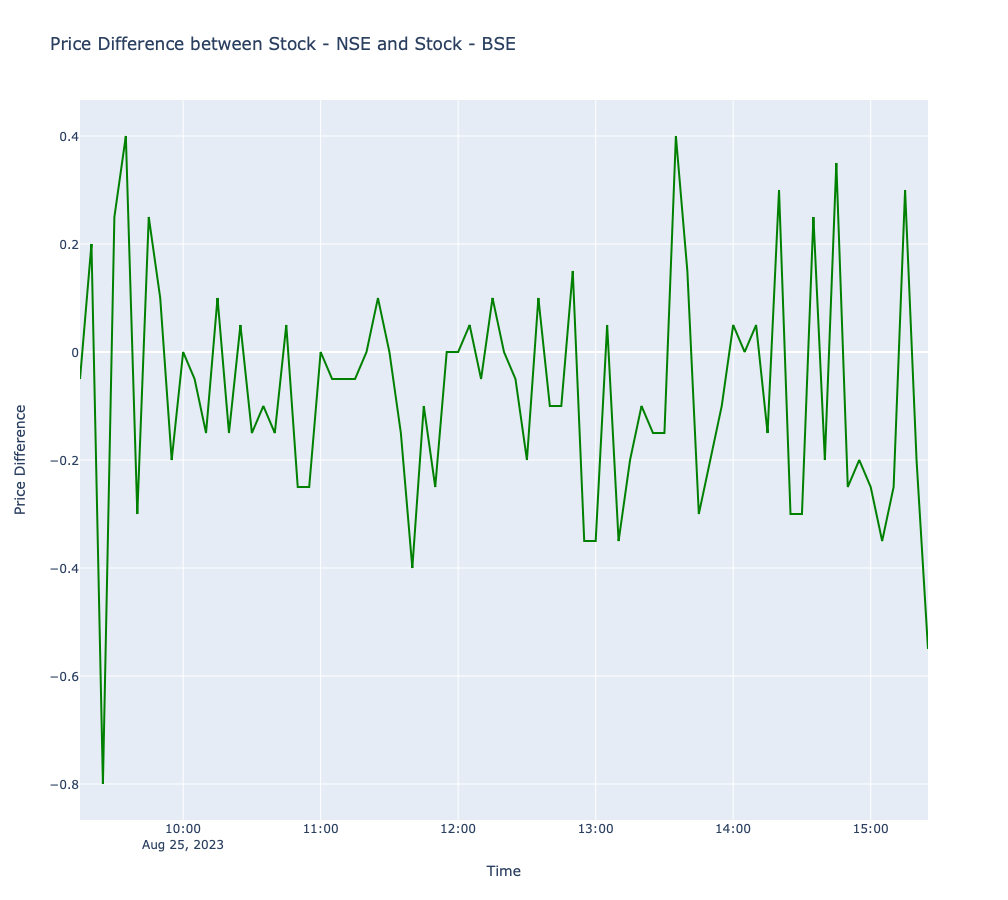

In [2]:
# Calculate the difference in closing prices
price_difference = nse_data['Close'] - bse_data['Close']

# Create an interactive plot for price difference
fig = go.Figure()

fig.add_trace(go.Scatter(x=price_difference.index, y=price_difference, mode='lines', name='Price Difference', line=dict(color='green')))

fig.update_layout(title='Price Difference between Stock - NSE and Stock - BSE',
                  xaxis_title='Time',
                  yaxis_title='Price Difference',
                 width=1200,
                 height=900)

# Show the interactive plot
fig.show()

In [3]:
print("converging count :",price_difference.pct_change()[price_difference.pct_change()<=0].shape)
print("diverging count :",price_difference.pct_change()[price_difference.pct_change()>0].shape)

converging count : (60,)
diverging count : (13,)


## similiar asset arbitrage

In [11]:
# Ticker symbols 
symbol_2 = "ICICIBANK.NS"
symbol_1 = "AXISBANK.NS"
index = "^NSEBANK"

period='5d'
interval='1m'
# Fetch data from Yahoo Finance
data_1 = yf.download(symbol_1, period=period, interval=interval)
data_2 = yf.download(symbol_2, period=period, interval=interval)
data_3 = yf.download(index, period=period, interval=interval)


# Create an interactive subplot
fig = make_subplots(rows=1, cols=1)

# Add traces to the subplot
fig.add_trace(go.Scatter(x=data_1.index,y=data_1['Close'], mode='lines', name=symbol_1, line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_2.index,y=data_2['Close'], mode='lines', name=symbol_2, line=dict(color='green')))
fig.add_trace(go.Scatter(x=data_3.index,y=data_3['Close']/48, mode='lines', name=index, line=dict(color='blue')))

# Update layout
fig.update_layout(title='Stock Prices: '+ symbol_1+ ' vs '+symbol_2,
                  xaxis_title='Date',
                  yaxis_title='Closing Price')

# Show the interactive plot
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


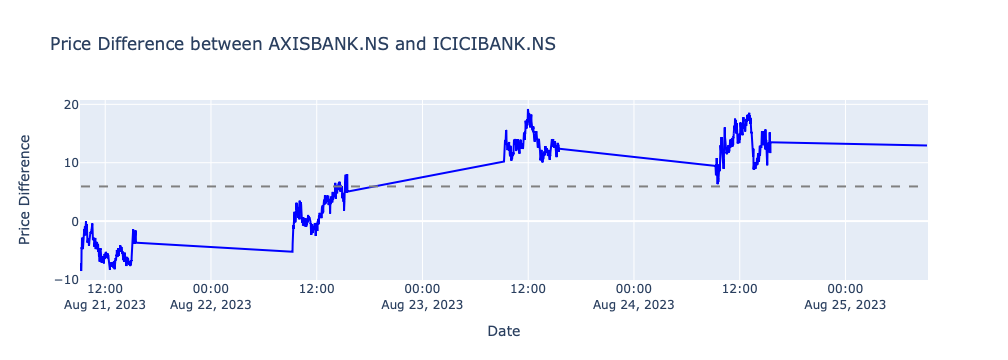

Max 19.20001220703125
Min -8.54998779296875
Median 7.04998779296875
Mean 5.934590101083014
Closing price 12.949951171875


In [22]:
preceding_period=370
price_difference_b=data_1["Close"]-data_2["Close"]
# Create an interactive plot for price difference
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.array(price_difference_b.index), y=price_difference_b[:-1 * preceding_period], mode='lines', name="Price Difference", line=dict(color='blue')))
# fig.add_trace(go.Scatter(x=data_3.index, y=(data_3["Close"][:-1 * preceding_period] - 43000) / 15, mode='lines', name='Scaled Bank Nifty', line=dict(color='red')))

mean_price_difference = price_difference_b[:-1 * preceding_period].mean()
fig.add_shape(type='line',
              x0=price_difference_b[:-1 * preceding_period].index[0], x1=price_difference_b[:-1 * preceding_period].index[-1],
              y0=mean_price_difference, y1=mean_price_difference,
              line=dict(color='gray', dash='dash'))

fig.update_layout(title='Price Difference between ' + symbol_1 + ' and ' + symbol_2,
                  xaxis_title='Date',
                  yaxis_title='Price Difference')

# Show the interactive plot
fig.show()

print('Max', price_difference_b[:-1 * preceding_period].max())
print('Min', price_difference_b[:-1 * preceding_period].min())
print('Median',price_difference_b[:-1 * preceding_period].median())
print('Mean', price_difference_b[:-1 * preceding_period].mean())
print('Closing price', price_difference_b[:-1 * preceding_period].tail(1)[0])




In [23]:
# Create an interactive plot for price difference using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=price_difference_b.tail(preceding_period).index, y=price_difference_b.tail(preceding_period), mode='lines', name='Price Difference', line=dict(color='purple')))

fig.update_layout(title='Current day Price Difference between ' + symbol_1 + ' and ' + symbol_2,
                  xaxis_title='Date and Time',
                  yaxis_title='Price Difference')

mean_price_difference = price_difference_b[:-1 * preceding_period].mean()
fig.add_shape(type='line',
              x0=price_difference_b.tail(preceding_period).index[0], x1=price_difference_b.tail(preceding_period).index[-1],
              y0=mean_price_difference, y1=mean_price_difference,
              line=dict(color='gray', dash='dash'))

# Show the interactive plot
fig.show()

print('Max', price_difference_b.tail(preceding_period).max())
print('Min', price_difference_b.tail(preceding_period).min())
print('Median', price_difference_b.tail(preceding_period).median())
print('Mean', price_difference_b.tail(preceding_period).mean())
print('Open price', np.array(price_difference_b.tail(preceding_period).head(1))[0])
print('Closing price', np.array(price_difference_b.tail(1))[0])


Max 15.79998779296875
Min 8.45001220703125
Median 11.375
Mean 11.564459393475508
Open price 12.39996337890625
Closing price 12.699951171875


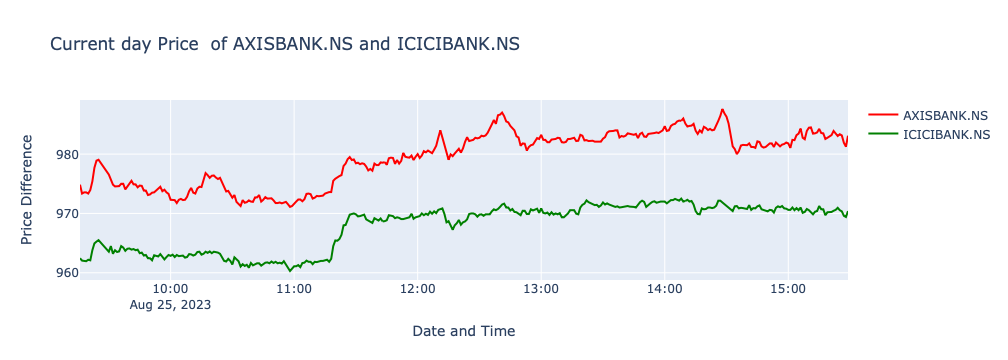

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.array(data_1["Close"].tail(preceding_period).index), y=np.array(data_1["Close"].tail(preceding_period)), mode='lines', name=symbol_1, line=dict(color='red')))
fig.add_trace(go.Scatter(x=np.array(data_2["Close"].tail(preceding_period).index), y=np.array(data_2["Close"].tail(preceding_period)), mode='lines', name=symbol_2, line=dict(color='green')))

fig.update_layout(title='Current day Price  of ' + symbol_1 + ' and ' + symbol_2,
                  xaxis_title='Date and Time',
                  yaxis_title='Price Difference')

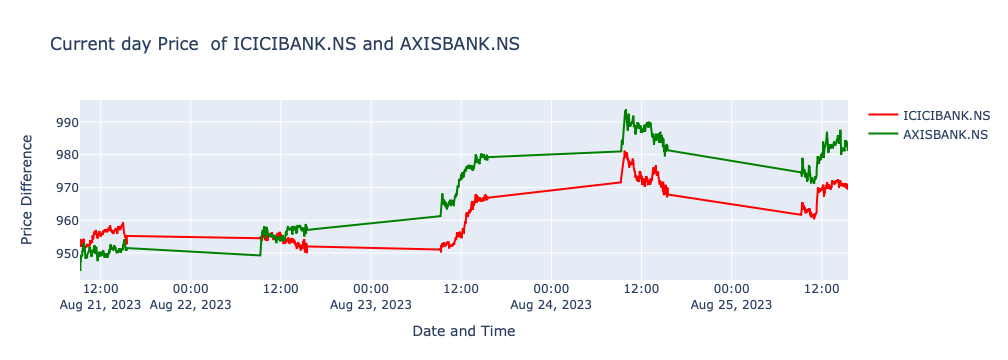

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_1["Close"].index, y=data_1["Close"], mode='lines', name=symbol_1, line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_2["Close"].index, y=data_2["Close"], mode='lines', name=symbol_2, line=dict(color='green')))

fig.update_layout(title='Current day Price  of ' + symbol_1 + ' and ' + symbol_2,
                  xaxis_title='Date and Time',
                  yaxis_title='Price Difference')

In [9]:
data_1.shape ## break each day into interval of 1 min

(1869, 6)